Urban Data Science & Smart Cities <br>
URSP688Y <br>
Instructor: Chester Harvey <br>
Urban Studies & Planning <br>
National Center for Smart Growth <br>
University of Maryland

[<img src="https://colab.research.google.com/assets/colab-badge.svg">](https://colab.research.google.com/github/ncsg/ursp688y_sp2024/blob/main/exercises/exercise05/exercise05.ipynb)

# Exercise 5

## Problem

So far, we've been examining affordable housing in DC with summary tables. Some of you have figured out how to incorporate graphic variables into these tables, using color to highlight minimums and maximums (good Googling!). However, we can often communicate much more convincingly, and even see patterns better ourselves, by making charts.

For this week's exercise, please:

- Write a function that makes a plot communicating a valuable statistic about affordable housing in each ward. You get to choose what's most valuable to show.
- The function should take an argument to filter by project status so it can be used to generate a plot representing projects that are either completed, under construction, or in the pipeline. (The same generalized function should be able to represent projects with any status.)
    - Optional: Can you specify the argument so it's also easy to see data for projects with all three statuses at once?
    - Optional: The function may also take additional arguments for whatever customization you think would be valuable for an end-user.
- The function should be stored in a module, loaded into a notebook, and called at least once in the notebook to demonstrate it.
- Please make a pull request with a folder containing your module (`.py` file), notebook (`.ipynb` file), any CSV files your analysis depends on, and any additional graphics files.

Bonus: Make it even better by exporting one plot to Illustrator or another software and fine-tuning it. Then include it in your PR folder and use markdown to show the resulting graphic in your notebook. (Hint: I demonstrate how to do this with markdown in the demo05 notebook.)

## Data

CSVs for the affordable housing dataset and ward census data are included on GitHub at `exercises/exercise05`. Please feel free to draw on other datasets, though this is not required. If you do use other data, please cite them, preferably with links, with markdown in your notebook or through comments in your code.


In [27]:
!pip install matplotlib
!pip install uszipcode
import matplotlib as plt
import pandas as pd
import os

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [88]:
wd_path = '/content/drive/MyDrive/ursp688y/Exercise5'
os.chdir(wd_path)

In [86]:
# # Import your module

import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
from uszipcode import SearchEngine
import seaborn as sns
sns.set_style('ticks') # Set a default style for this Python session

# Function to filter by project status
def filter_by_project_status(data, proj_status):
  mask = data['STATUS_PUBLIC'] == proj_status
  return mask
  #print(proj_status)

# Function to add join csv files and to add zipcode information
def housing_function(housing_projects_info, ward_info, project_status):
  housing_projects_with_pops_props = pd.merge(housing_projects_info, ward_info, left_on='MAR_WARD', right_on='NAME')

  housing_projects_with_pops_props = pd.merge(
      housing_projects_info, ward_info[['NAME','POP100','HU100']],
      left_on = 'MAR_WARD',
      right_on = 'NAME'
  )

  # Creates the Zipcode column in the data frame.
  housing_projects_with_pops_props["Zipcode"] = "00000"
  # eng is for zipcode finder
  eng = SearchEngine()

  # For loop to populate the Zipcode column with accurate zipcodes for each project.
  # It iterates row by row to take the last 5 digits of the full address which
  # contain the zipcodes for each project
  for i, r in housing_projects_with_pops_props.iterrows():
    holder = r['ADDRESS']
    length = len(holder)
    zipcodes = holder[length - 5:]
    zipcodeSTR = str(zipcodes)
    # if statement to ensure the last five digits are the zipcode.
    if(zipcodes.isnumeric()):
      housing_projects_with_pops_props.at[i, 'Zipcode'] = zipcodeSTR
    # if statement is to catch the one address that did not include zipcode. I tried
    # to import and use the uszipcode locator funtion which is commented out below, but
    # I couldn't figure out how to actually retrieve the zipcode from the data structure.
    if(zipcodes.isnumeric() == False):
      missing_zipcode = eng.by_coordinates(r['LATITUDE'], r['LONGITUDE'], 1)
      housing_projects_with_pops_props.at[i, 'Zipcode'] = '20001'
      # housing_projects_with_pops_props.at[i, 'Zipcode'] = missing_zipcode
      # print(missing_zipcode.zipcode)

  return housing_projects_with_pops_props

def graph_function(ddff):
  ddff[ddff["STATUS_PUBLIC"] == p_status]
  ddff.to_csv('test_file.csv', index=False)

  zip_counts = ddff['Zipcode'].value_counts()
  zip_counts

  names = zip_counts.index
  counts = zip_counts.values

  sns.countplot(ddff, x='Zipcode', order=df['Zipcode'].value_counts().index)

  ax = sns.barplot(ddff, x = 'Zipcode', y = zip_counts, errorbar = None)
  ax.set(
    xlabel='Zipcode',
    ylabel='Number of Projects'
  )
  plt.legend(title= "Housing Projects in Washington D.C. by Zipcode", frameon=False)
  plt.xticks(rotation=60)
  for i in ax.containers:
    ax.bar_label(i,)
  sns.despine()


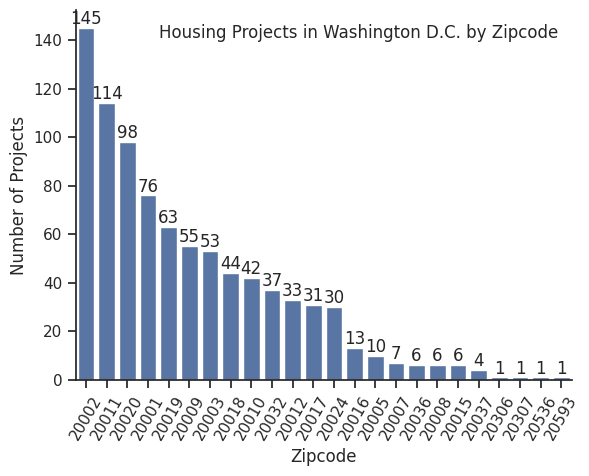

In [93]:
#Checking that given csv files are readable
housing_projects = pd.read_csv('affordable_housing.csv')
ward_data = pd.read_csv('wards_from_2022.csv')
p_status = 'Completed 2015 to Date'

# Attempted to import module, did not work.
# Error message states "module 'module_suchecki_exercise5' has no attribute 'housing_function'"
import module_suchecki_exercise5
# %load_ext autoreload
# %autoreload 2
# df = module_suchecki_exercise5.housing_function(housing_projects, ward_data, p_status)
df = pd.DataFrame(housing_function(housing_projects, ward_data, p_status))
graph_function(df)